No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


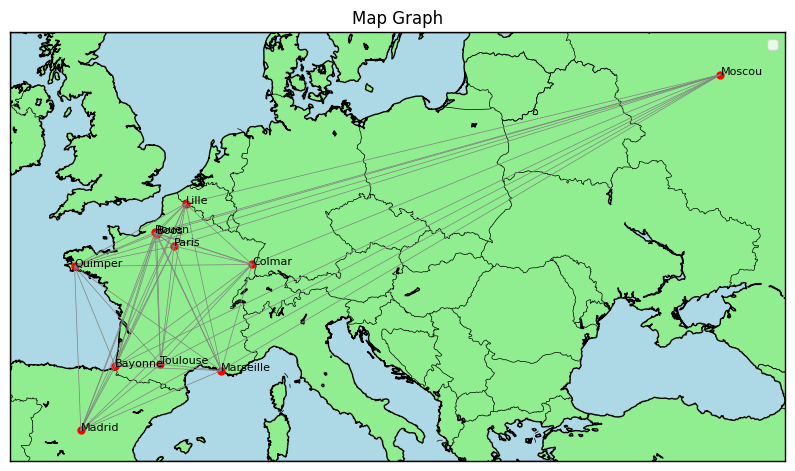

In [1]:
import sys
import os
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), "Livrable 2/AntColonies")))

import numpy as np
import random
from Graphs.RandomGraph import RandomGraph
from Graphs.MapGraph import MapGraph


random.seed(0)
np,random.seed(0)

# graph = RandomGraph(node_number=20,min_weight=1,max_weight=10)
# cities = [
#     "Boos", "Rouen", "Franqueville-Saint-Pierre", "Le Mesnil-Esnard", "Saint-Etienne-Du-Rouvray",
#     "Montmain", "Bois-Guillaume", "Bonsecours", "Sotteville-lès-Rouen", "Mont-Saint-Aignan",
#     "Le Grand-Quevilly", "Le Petit-Quevilly", "Canteleu", "Déville-lès-Rouen", "Darnétal",
#     "Elbeuf", "Oissel", "Maromme", "Cléon", "Saint-Aubin-lès-Elbeuf", "Saint-Aubin-Celloville",
#     "Saint-Martin-du-Vivier", "Saint-Jacques-sur-Darnétal", "Saint-Léger-du-Bourg-Denis",
#     "Saint-Pierre-de-Manneville", "Saint-Pierre-de-Varengeville", "Saint-Martin-de-Boscherville",
#     "Saint-Aubin-Épinay", "Saint-Paër", "Isneauville", "Hénouville", "Houppeville", "Malaunay",
#     "Jumièges", "La Bouille", "Duclair", "Notre-Dame-de-Bondeville", "Petit-Couronne"
# ]

#cities = ["Bouffry","Yermenonville","Valennes","Mondoubleau","Arquenay", "Nantes", "Boos", "La Rochelle", "Bordeaux", "Toulouse", "Montpellier", "Marseille", "Lyon", "Le Mans", "Riom","Bergerac","Vic-sur-Cère", "Clermont-Ferrand","Sucé-sur-Erdre", "Rezé","Rieux"]
cities = ["Marseille", "Rouen", "Lille", "Quimper", "Colmar", "Paris", "Bayonne", "Toulouse", "Madrid", "Moscou"]
#create real graph
graph = MapGraph(cities=cities,start_city="Boos")
graph.plot_graph()

Removed 8 edges of 55
Costed 9 edges of 47


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


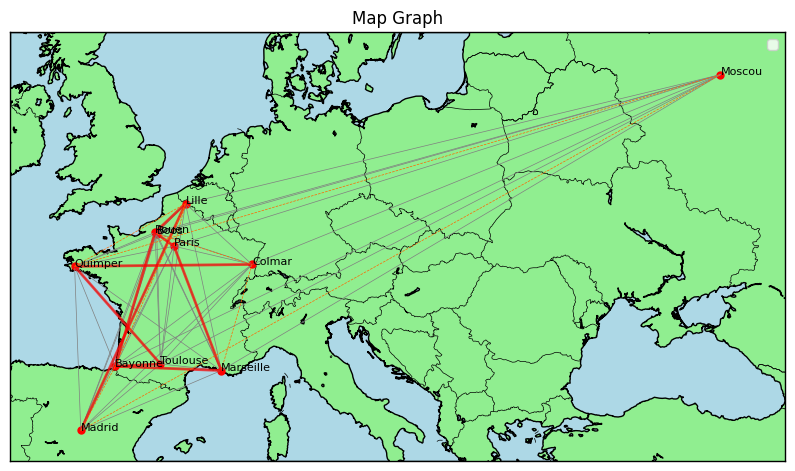

In [2]:
#Filtration
graph.apply_edge_blocking(percentage=20)
graph.apply_edge_costly(percentage=20)

graph.plot_graph()

Algorithm Genetic Algorithm : 



TypeError: unhashable type: 'list'

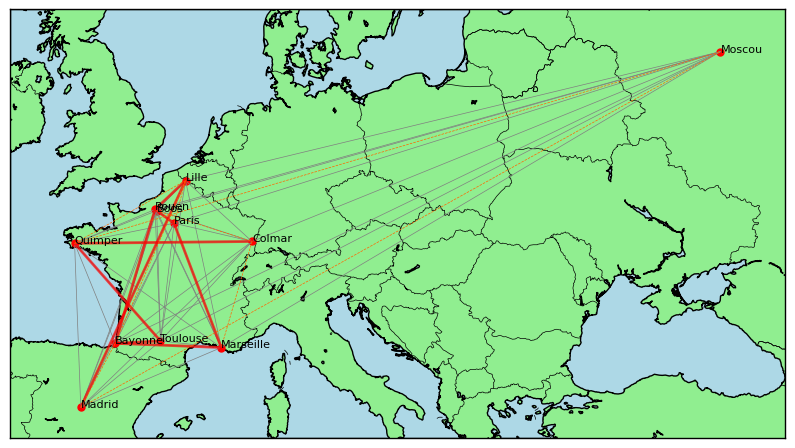

In [3]:
from Algorithms.ACO.AcoAlgo import AcoAlgo
from Algorithms.Greedy.GreedyAlgo import GreedyAlgo
from Algorithms.Genetic.GeneticAlgo import GeneticAlgo
from utils.plot import Plot


def run_algorithm(graph,algorithm):
    algorithm.run()
    print(f"Algorithm {algorithm.name} : \n")
    vehicles_paths = {i + 1: path for i, path in enumerate(algorithm.paths)}
    current_path_results = {}
    current_path_results[algorithm.name] = vehicles_paths
    algorithms_path_results[algorithm.name] = current_path_results[algorithm.name]
    algorithms_distance_results[algorithm.name] = algorithm.distance_history
    # Print the best path found and the total distance
    graph.plot_graph(current_path_results)
    print(f"Best paths: {algorithm.paths}")
    print(f"Total distance: { algorithm.distance}")
    print(f"Number of iterations needed to find the solution : {algorithm.iterations_needed}")
    print(f"Total number of iterations : {algorithm.total_interations_realized}")
    

def run_algorithms(graph, algorithms):
    for algorithm in algorithms:
        run_algorithm(graph,algorithm)
    Plot.plot_distance_over_iterations_comparison(algorithms_distance_results)
    graph.plot_graph(algorithms_path_results)



algorithms_distance_results = {}
algorithms_path_results = {}
min_iterations = 50
max_iterations = 100
convergence_threshold = 10
ACO0 = AcoAlgo(graph=graph, name="ACO : 500 ants", num_ants=500, decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
ACO1 = AcoAlgo(graph=graph, name="ACO : 100 ants", num_ants=100, decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
ACO2 = AcoAlgo(graph=graph, name="ACO : 10 ants", num_ants=10, decay=0.7, alpha=0.5, min_iterations = min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
GREEDY0 = GreedyAlgo(graph=graph, name= "Greedy Loop", min_iterations=min_iterations,max_iterations=max_iterations, convergence_threshold=convergence_threshold)
GENETICALGO0 = GeneticAlgo(graph=graph, name="Genetic Algorithm")  
# algorithms = [ACO0,ACO1,ACO2, GREEDY0, GENETICALGO0]
algorithms = [GENETICALGO0]
run_algorithms(graph=graph,algorithms=algorithms)

#reset all datas
del ACO0
del ACO1
del ACO2
del GREEDY0
del algorithms
del algorithms_distance_results
del algorithms_path_results

